In [29]:
print("https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/")

https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/


In [30]:
import pandas
import matplotlib.pyplot as plt
import math
import numpy
from keras.models import Sequential
from keras.layers import Dense

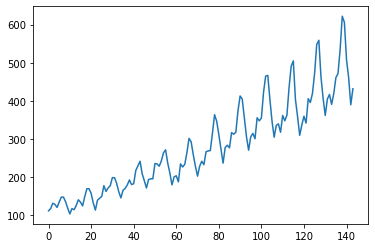

In [31]:
dataset = pandas.read_csv(r'C:\Users\nCalo\Documents\Automifai\Research\Coding Lessons\Keras\Data sets\airline_passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [32]:
dataframe = pandas.read_csv(r'C:\Users\nCalo\Documents\Automifai\Research\Coding Lessons\Keras\Data sets\airline_passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [33]:
train_size = int(len(dataset)* .67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [34]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [35]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [36]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=2, verbose=2)

Epoch 1/50
 - 0s - loss: 57519.6649
Epoch 2/50
 - 0s - loss: 40762.4025
Epoch 3/50
 - 0s - loss: 28843.4311
Epoch 4/50
 - 0s - loss: 19693.1729
Epoch 5/50
 - 0s - loss: 13347.8935
Epoch 6/50
 - 0s - loss: 8581.5872
Epoch 7/50
 - 0s - loss: 5311.7507
Epoch 8/50
 - 0s - loss: 3121.1186
Epoch 9/50
 - 0s - loss: 1852.8807
Epoch 10/50
 - 0s - loss: 1143.0518
Epoch 11/50
 - 0s - loss: 792.0619
Epoch 12/50
 - 0s - loss: 642.4590
Epoch 13/50
 - 0s - loss: 573.0723
Epoch 14/50
 - 0s - loss: 549.9555
Epoch 15/50
 - 0s - loss: 543.1548
Epoch 16/50
 - 0s - loss: 538.1766
Epoch 17/50
 - 0s - loss: 538.6093
Epoch 18/50
 - 0s - loss: 538.1382
Epoch 19/50
 - 0s - loss: 540.2986
Epoch 20/50
 - 0s - loss: 539.1949
Epoch 21/50
 - 0s - loss: 538.7371
Epoch 22/50
 - 0s - loss: 537.9679
Epoch 23/50
 - 0s - loss: 540.1848
Epoch 24/50
 - 0s - loss: 537.0489
Epoch 25/50
 - 0s - loss: 538.7055
Epoch 26/50
 - 0s - loss: 538.1423
Epoch 27/50
 - 0s - loss: 540.2359
Epoch 28/50
 - 0s - loss: 538.0333
Epoch 29/50
 -

In [37]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 534.62 MSE (23.12 RMSE)
Test Score: 2361.72 MSE (48.60 RMSE)


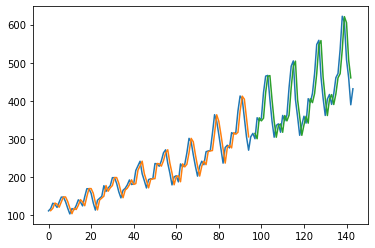

In [38]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()